# Two Class Adaboost

Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html

This example fits an AdaBoosted decision stump on a non-linearly separable classification dataset composed of two “Gaussian quantiles” clusters (see `sklearn.datasets.make_gaussian_quantiles`) and plots the decision boundary and decision scores. The distributions of decision scores are shown separately for samples of class A and B. The predicted class label for each sample is determined by the sign of the decision score. Samples with decision scores greater than zero are classified as B, and are otherwise classified as A. The magnitude of a decision score determines the degree of likeness with the predicted class label. Additionally, a new dataset could be constructed containing a desired purity of class B, for example, by only selecting samples with a decision score above some value.

In [1]:
using PyPlot
using ScikitLearn
using ScikitLearn.Utils: meshgrid

@sk_import datasets: make_gaussian_quantiles
@sk_import ensemble: AdaBoostClassifier
@sk_import tree: DecisionTreeClassifier

PyObject <class 'sklearn.tree.tree.DecisionTreeClassifier'>

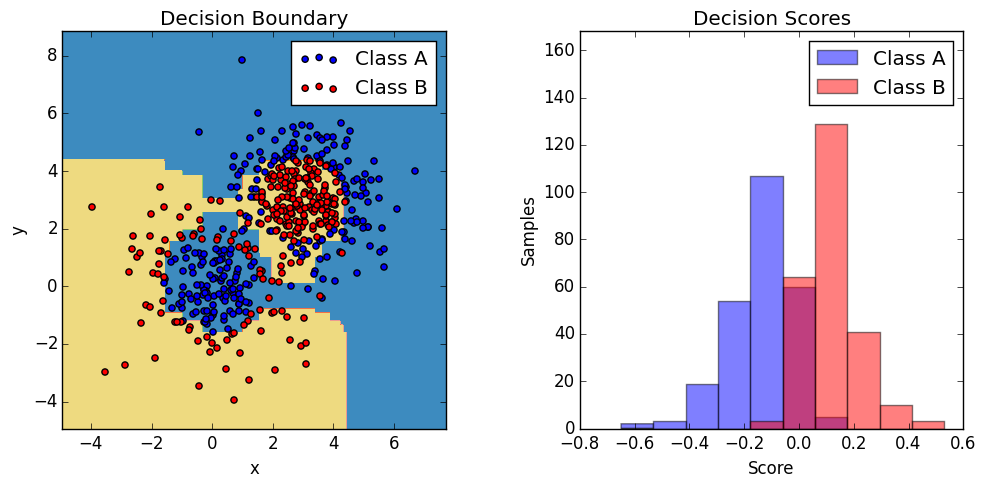

In [4]:
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1);
X = vcat(X1, X2);
y = vcat(y1, -y2 + 1);

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                algorithm="SAMME",
                                n_estimators=200)
fit!(bdt, X, y);

# Plot the decision boundaries
figure(figsize=(10, 5))

subplot(121)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

x_min, x_max = minimum(X[:, 1]) - 1, maximum(X[:, 1]) + 1
y_min, y_max = minimum(X[:, 2]) - 1, maximum(X[:, 2]) + 1
xx, yy = meshgrid(x_min:plot_step:x_max, y_min:plot_step:y_max)

Z = predict(bdt, hcat(xx[:], yy[:]));

Z = reshape(Z, size(xx)...);

cs = contourf(xx, yy, Z, cmap=get_cmap("Paired"))
plt[:axis]("tight")

# Plot the training set
for (i, n, c) in zip(0:1, class_names, plot_colors)
    idx = find(y .== i)
    scatter(X[idx, 1], X[idx, 2],
            c=string(c), cmap=get_cmap("Paired"),
            label="Class $n")
end

xlim(x_min, x_max)
ylim(y_min, y_max)
legend(loc="upper right")
xlabel("x")
ylabel("y")
title("Decision Boundary")

subplot(122)
# Plot the two-class decision scores
twoclass_output = decision_function(bdt, X)
plot_range = (minimum(twoclass_output), maximum(twoclass_output))
subplot(122)
for (i, n, c) in zip(0:1, class_names, plot_colors)
    plt[:hist](twoclass_output[y .== i],
               bins=10,
               range=plot_range,
               facecolor=string(c),
               label="Class $n",
               alpha=.5)
end

x1, x2, y1, y2 = axis()
axis((x1, x2, y1, y2 * 1.2))
legend(loc="upper right")
ylabel("Samples")
xlabel("Score")
title("Decision Scores")

tight_layout()
subplots_adjust(wspace=0.35)